# A Hands-on Tutorial on Open-Source Research in Structural Dynamics and Image-Based Experimental Modal Analysis

**Klemen Zaletelj$^a$, Domen Gorjup$^a$ and Janko Slavič$^a$\***

$^a$ Faculty of Mechanical Engineering, University of Ljubljana

\* Corresponding email: janko.slavic@fs.uni-lj.si

www.ladisk.si

---

# `github.com/ladisk/open_source_research_in_structural_dynamics`

---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Open-source-concepts-in-scientific-research" data-toc-modified-id="Open-source-concepts-in-scientific-research-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Open-source concepts in scientific research</a></span></li><li><span><a href="#Open-source-tools-for-structural-dynamics" data-toc-modified-id="Open-source-tools-for-structural-dynamics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Open-source tools for structural dynamics</a></span><ul class="toc-item"><li><span><a href="#SciPy" data-toc-modified-id="SciPy-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><a href="https://www.scipy.org/" target="_blank">SciPy</a></a></span></li><li><span><a href="#PyFRF" data-toc-modified-id="PyFRF-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span><a href="https://github.com/openmodal/pyFRF" target="_blank">PyFRF</a></a></span></li><li><span><a href="#PyEMA" data-toc-modified-id="PyEMA-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span><a href="https://github.com/ladisk/pyEMA" target="_blank">PyEMA</a></a></span></li><li><span><a href="#PyIDI" data-toc-modified-id="PyIDI-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span><a href="https://github.com/ladisk/pyidi" target="_blank">PyIDI</a></a></span></li><li><span><a href="#FLife" data-toc-modified-id="FLife-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span><a href="https://github.com/ladisk/FLife" target="_blank">FLife</a></a></span></li><li><span><a href="#PyUFF" data-toc-modified-id="PyUFF-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span><a href="https://github.com/openmodal/pyuff" target="_blank">PyUFF</a></a></span></li></ul></li><li><span><a href="#High-speed-camera-measureemnts-in-structural-dynamics" data-toc-modified-id="High-speed-camera-measureemnts-in-structural-dynamics-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>High-speed camera measureemnts in structural dynamics</a></span><ul class="toc-item"><li><span><a href="#Acquisition-parameters" data-toc-modified-id="Acquisition-parameters-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Acquisition parameters</a></span></li><li><span><a href="#Lighting" data-toc-modified-id="Lighting-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Lighting</a></span></li><li><span><a href="#Surface-preperation" data-toc-modified-id="Surface-preperation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Surface preperation</a></span></li><li><span><a href="#Possible-errors" data-toc-modified-id="Possible-errors-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Possible errors</a></span><ul class="toc-item"><li><span><a href="#Out-of-focus-image" data-toc-modified-id="Out-of-focus-image-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Out of focus image</a></span></li><li><span><a href="#Improper-lighting" data-toc-modified-id="Improper-lighting-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Improper lighting</a></span></li></ul></li><li><span><a href="#Simplified-Optical-flow-Method" data-toc-modified-id="Simplified-Optical-flow-Method-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Simplified Optical-flow Method</a></span></li><li><span><a href="#The-Lucas-Kanade-Method" data-toc-modified-id="The-Lucas-Kanade-Method-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>The Lucas-Kanade Method</a></span></li><li><span><a href="#Frequency-Response-Functions" data-toc-modified-id="Frequency-Response-Functions-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Frequency Response Functions</a></span></li></ul></li><li><span><a href="#Real-life-example-of-image-based-vibration-measurement" data-toc-modified-id="Real-life-example-of-image-based-vibration-measurement-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Real-life example of image-based vibration measurement</a></span><ul class="toc-item"><li><span><a href="#Modal-Analysis---camera-data,-only" data-toc-modified-id="Modal-Analysis---camera-data,-only-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Modal Analysis - camera data, only</a></span></li><li><span><a href="#Modal-Analysis---Hybrid-method" data-toc-modified-id="Modal-Analysis---Hybrid-method-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Modal Analysis - Hybrid method</a></span></li></ul></li></ul></div>

To run this tutorial, the following Python packages must be installed:

* ``pip install scipy``
* ``pip install numpy``
* ``pip install matplotlib``
* ``pip install lvm_read``
* ``pip install lvm_read``
* ``pip install pyFRF``
* ``pip install pyidi``
* ``pip install pyEMA``
* ``pip install FLifr``
* ``pip install pyuff``

You can get them all at once by running:

``pip install -r requirements.txt``

In [2]:
import os
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

# Lahko kaj počistimo?
#import matplotlib.patches as patches
#from matplotlib.animation import FuncAnimation
#from ipywidgets import interact
#from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

import warnings
warnings.filterwarnings('ignore')

import lvm_read
import pyFRF
import pyidi
import pyEMA
import FLife
import pyuff

Some settings and functions that will be used during presentation:

In [3]:
%matplotlib inline

font_size = 15
fig_size = (16.0, 8.0)

plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = fig_size
matplotlib.rcParams['font.size'] = font_size


def show_modal_data(nat_freq, damping):
    """Show modal data in a table-like structure."""
    print('   Nat. f.      Damping')
    print(23*'-')
    for i, f in enumerate(nat_freq):
        print(f'{i+1}) {f:6.1f}\t{damping[i]:5.4f}')
        

def plot_mode_shape(shape, axis, style='o-', frequency=None, **kwargs):
    """Plot a mode shape in a consistent fashion."""
    plot = axis.plot(shape / np.max(np.abs(shape)) * np.sign(shape[0]), 
                     style, **kwargs)
    if frequency is not None:
        axis.set_title(f'Mode shape - {frequency:.0f} Hz')
    axis.set_yticks([])
    plt.tight_layout()

---

## Open-source concepts in scientific research

---

## Open-source tools for structural dynamics

### [SciPy](https://www.scipy.org/)

The [SciPy](https://www.scipy.org/index.html) stack is a collection of open-source Python software for science and engineering. It consists of six core packages, including:

**[Numpy](http://www.numpy.org/)**: 

* Adds support for the efficient multidimentional ``ndarray`` data object for numerical data representation. 
* Functions for *numerical data manipulation*, *linear algebra* and *the Fourier transform*.

In [4]:
import numpy as np

L = [1, 2, 3, 4, 5] # This is a list
a = np.array(L)     # This is an array
a

array([1, 2, 3, 4, 5])

Note the difference:

In [5]:
2*L

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [6]:
2*a

array([ 2,  4,  6,  8, 10])

A range of numbers:

In [7]:
a1 = np.arange(0, 10, 2)
a1

array([0, 2, 4, 6, 8])

Linearly spaced values:

In [8]:
a2 = np.linspace(0, 10, 6, dtype=complex)
a2

array([ 0.+0.j,  2.+0.j,  4.+0.j,  6.+0.j,  8.+0.j, 10.+0.j])

Multidimensional arrays represent matrices:

In [9]:
M = np.random.rand(3, 3) # This is a matrix
M

array([[0.04918176, 0.0342785 , 0.02359165],
       [0.20485267, 0.55253034, 0.72488702],
       [0.7996366 , 0.934633  , 0.14201141]])

**[Matplotlib](https://matplotlib.org/)**:

* A plotting library for producing publication-ready data visualizations.
* A MATLAB-inspired user interface.


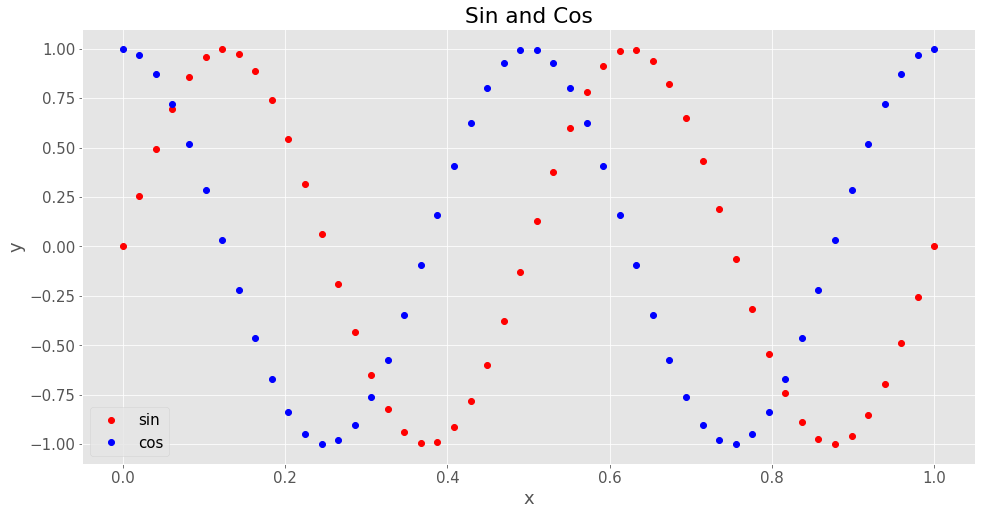

In [10]:
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 50) # x coordinates
y1 = np.sin(2*np.pi*2*x)   # y coordinates
y2 = np.cos(2*np.pi*2*x)   # y coordinates

plt.plot(x, y1, 'ro', label='sin')
plt.plot(x, y2, 'bo', label='cos')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sin and Cos')
plt.grid(True)

(Outside the Jupyter eenvironment, things are a bit different! Some extra lines of code are required.)

**[The SciPy library](https://docs.scipy.org/doc/scipy/reference/)** provides user-friendly and efficient numerical routines for:

* Signal processing,
* numerical integration,
* optimization,
* interpolation.

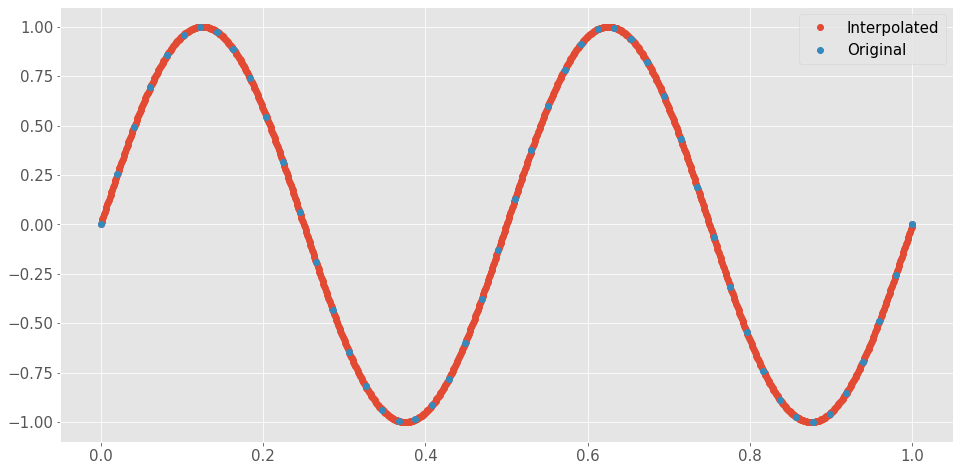

In [11]:
from scipy.interpolate import InterpolatedUnivariateSpline

x_int = np.linspace(0, 1, 1000)
spl = InterpolatedUnivariateSpline(x, y1, k=3)

plt.plot(x_int, spl(x_int), 'o', label='Interpolated')
plt.plot(x, y1, 'o', label='Original')
plt.legend()

### [PyFRF](https://github.com/openmodal/pyFRF)

### [PyEMA](https://github.com/ladisk/pyEMA)

### [PyIDI](https://github.com/ladisk/pyidi)

### [FLife](https://github.com/ladisk/FLife)

### [PyUFF](https://github.com/openmodal/pyuff)

---

## High-speed camera measureemnts in structural dynamics
**Experimental setup**

<img src="figures/experiment_setup.jpg" width="80%">

**Excitation with modal hammer**

<video controls loop src="figures/experiment.mp4" width="100%" rotate="270deg"/>

Location of the selected files:

In [ ]:
cam_fname = 'data/camera.cih'
lvm_fname = 'data/acceleration.lvm'

Load the video using [pyidi][1] package, accessible on PyPI.

[1]: https://github.com/ladisk/pyidi

The package enables calculation of displacements and will be upgraded with additional functionalities.

Currently only Photron's MRAW image file format is supported.

In [ ]:
video = pyidi.pyIDI(cam_fname)

Images are stored in the ``mraw`` attribute.

In [ ]:
sequential_image_nr = 175
plt.imshow(video.mraw[sequential_image_nr], cmap='gray')
plt.grid(False)

*This example footage is for presentation purposes only and was made to be suitable for online sharing.*

*Normaly image acquisation parameters such as frame rate and image resolution would be chosen as high as possible to obtain more precise results.*

<video controls loop src="figures/video.MOV" width="950" rotate="270deg"/>

### Acquisition parameters

The parameters that were used when recording can be found in the ``info`` attribute:

In [ ]:
video.info

### Lighting
Lighting conditions are very important when using high-speed camera. To obtain optimal lighting conditions, a histogram of pixel intensity is viewed. An example of a well balanced historgram is shown.

In [ ]:
selected_frame = 0
x0 = 300 # position of observed rectangle
y0, d = 9, 25
roi = video.mraw[selected_frame, y0:y0+d, x0:x0+d]

fig, ax = plt.subplots(2)
ax[0].imshow(video.mraw[selected_frame], cmap='gray')
ax[1].hist(roi.flatten(), bins=50);
# Formating
ax[0].add_patch(patches.Rectangle((x0, y0), d, d, fill=False, color='r', linewidth=2))
ax[0].grid(False)
ax[1].set_xlabel('Grayscale value [/]')
ax[1].set_ylabel('n pixels [/]')
plt.tight_layout()

### Surface preperation
In order for gradient-based methods to work, sufficient gradient must be present on the images. Surface preperations is therefor necessary.

Stripe pattern and random speckle pattern generation is implemented in the [speckle-pattern][1] python module. In this case, horizontal stripes were used.

[1]: https://github.com/ladisk/speckle_pattern

In [ ]:
grad0, grad1 = np.gradient(video.mraw[0].astype(float)) # gradient computation

In [ ]:
x0 = 200 # position of cross section

fig, ax = plt.subplots(2)
ax[0].imshow(video.mraw[selected_frame], cmap='gray')
ax[1].plot(video.mraw[selected_frame, :, x0], label='Grayscale value')
ax[1].plot(grad0[:, x0], label='Gradient')
# Formating
ax[0].vlines(x0, 0, 40, colors='r', linewidth=3)
ax[0].text(x0+10, -5, 'Cross section')
ax[0].arrow(x0+50, 5, -35, 20, color='r', width=3)
ax[0].grid(False)
ax[1].set_xlabel('Image height [px]')
ax[1].set_ylabel('Grayscale/gradient value [/]')
plt.legend()
plt.tight_layout()

### Possible errors

#### Out of focus image
The right side of the beam is in focus, while the left side is not.

In [ ]:
layout_fname = r'data/focus.cih'
video_layout = pyidi.pyIDI(layout_fname)

In [ ]:
fig, ax = plt.subplots()
ax.imshow(video_layout.mraw[0], 'gray')

# Formating
ax.grid(False)
plt.tight_layout()

#### Improper lighting

In [ ]:
light_fname = r'data/illumination.cih'
video_light = pyidi.pyIDI(light_fname)

In [ ]:
selected_frame = 0
y0, d = 9, 20

def show(x0):
    roi = video_light.mraw[selected_frame, y0:y0+d, x0:x0+d*2]
    fig, ax = plt.subplots(2)
    ax[0].imshow(video_light.mraw[selected_frame], cmap='gray')
    ax[1].hist(roi.flatten(), bins=50);
    # Formating
    ax[0].add_patch(patches.Rectangle((x0, y0), d*2, d, fill=False, color='r', linewidth=2))
    ax[0].grid(False)
    ax[1].set_xlabel('Grayscale value [/]')
    ax[1].set_ylabel('n pixels [/]')
    ax[1].set_xlim([0, 260])
    plt.tight_layout()
interact(show, x0=(75, 550, 50));

### Simplified Optical-flow Method

Basic formulation:
$$
s(x_j,y_k,t)=\frac{I_0(x_j,y_k)-I(x_j,y_k,t)}{|\nabla I_0|}
$$

As used by [Javh et al.][1] ([pdf][2]).

[1]: https://www.sciencedirect.com/science/article/pii/S0888327016304770
[2]: http://lab.fs.uni-lj.si/ladisk/?what=abstract&ID=179

First, the reference image must be computed:

In [ ]:
reference_image = np.average(video.mraw[:10], axis=0)

and gradients in ``x`` (1) and ``y`` (0) directions:

In [ ]:
grad0, grad1 = np.gradient(reference_image)

Points with the highest absolute value of gradient in **vertical** direction are determined:

In [ ]:
border = 20
border_h = 12
n = 2
N = 16
w = np.arange(border, reference_image.shape[1]-border, np.abs(border - reference_image.shape[1]-border)//N)
h = np.argsort(np.abs(grad0[border_h:-border_h, w]), axis=0)[-n:, :].T + border_h
inds = np.column_stack((h.flatten(), w.repeat(n)))

In [ ]:
fig, ax = plt.subplots()
ax.imshow(grad0, cmap='gray')
ax.scatter(inds[:, 1], inds[:, 0])
ax.grid(False)
ax.set_title('Gradient in $y$-direction');

Displacement computation, implemented in ``pyidi``:

In [ ]:
video.set_points(points=inds) # setting points for analysis

In [ ]:
video.set_method(method='sof',
                mean_n_neighbours=n)

``get_displacements()`` method computes the displacements.

In [ ]:
displacements = video.get_displacements() * 8e-5

In [ ]:
location = 1

In [ ]:
fig, ax = plt.subplots()
ax.plot(displacements[location, :, 0], label='Direction 0 (y)');
ax.set_xlabel('Image [/]]')
ax.set_ylabel('Displacement [m]')
plt.legend()

### The Lucas-Kanade Method

By solving an overdetermined system of optical flow equations for a specified region of the image, 2D displacements of the subset can be calculated:

$$
\begin{equation}
	\begin{bmatrix}
		\Delta x \\
		\Delta y
	\end{bmatrix} =
	\begin{bmatrix}
		\sum g_x^2 &\sum  g_x \, g_y \\
		\sum  g_x \, g_y &\sum g_y^2
	\end{bmatrix}^{-1}
	\begin{bmatrix}
		\sum g_x \, (f-g) \\
		\sum g_y \, (f-g)
	\end{bmatrix}
\end{equation}
$$

where 

$f(\mathbf{x}) \dots$ current (displaced) image

$g(\mathbf{x}) \dots$ reference image

In [ ]:
points_lk = np.column_stack([np.ones_like(w)*video.info['Image Height']//2, w])

In [ ]:
video.set_points(points_lk)
video.set_method('lk', roi_size=(21, 23), max_nfev=10, int_order=3)

In [ ]:
points_lk.shape

In [ ]:
video.show_points()

In [ ]:
# displacements_lk = video.get_displacements(processes=2) * 8e-5 # this might take a minute

In [ ]:
displacements_lk = np.load('data/displacements_lk.npy')

In [ ]:
fig, ax = plt.subplots()
ax.plot(displacements_lk[location, :, 0], label='Direction 0 (y)')
ax.set_xlabel('Image [/]]')
ax.set_ylabel('Displacement [m]')
plt.legend()

In [ ]:
displacements = displacements_lk

### Frequency Response Functions

First the FFT of displacement is computed:

In [ ]:
N = int(video.info['Total Frame'])
dt = 1/int(video.info['Record Rate(fps)'])
1/dt

In [ ]:
T = dt*N
T

In [ ]:
upper_f_limit = 4000 # upper observed frequency

In [ ]:
freq_cam = np.fft.rfftfreq(N, dt)
fft_cam = np.fft.rfft(displacements[:, :, 0], N) *2/N

Later the frequency range below `upper_f_limit` Hz is used:

In [ ]:
fft_cam = np.copy(fft_cam[:, freq_cam<upper_f_limit])
freq_cam = np.copy(freq_cam[freq_cam<upper_f_limit])

The FFT of force measurement is (also limited to `upper_f_limit`):

In [ ]:
lvm = lvm_read.read(lvm_fname)
force = lvm[0]['data'][:-30, 1] # 30 pre-samples
N = len(force)//4 # the video was captured for 1/4 of a second
dt = lvm[0]['Delta_X'][1]

fft_force = np.fft.rfft(force, N) *2/N
freq_force = np.fft.rfftfreq(N, dt)

fft_force = np.copy(fft_force[freq_force<upper_f_limit])
freq_force = np.copy(freq_force[freq_force<upper_f_limit])

Since only one measurement was used, the FRF is determined by:

In [ ]:
frf_cam = fft_cam/fft_force 

In [ ]:
plt.semilogy(freq_cam, np.abs(frf_cam[location]));

## Real-life example of image-based vibration measurement

### Modal Analysis - camera data, only

Modal analysis can be made using ``pyEMA`` package, accessible on [PyPI][1].

[1]: https://pypi.org/project/pyEMA/

In [ ]:
cam = pyEMA.Model(frf_cam, freq_cam, pol_order_high=50, upper=upper_f_limit)

Poles are computed:

In [ ]:
cam.get_poles(show_progress=True)

Stable poles can be picked in the stability chart, or preditermind by passing in approximate natural frequencies (picking poles works only in the interactive mode, use magic command: %matplotlib qt).

In [ ]:
cam.stab_chart(cam.all_poles)

In [ ]:
cam.print_modal_data()

After the stable poles are determind, a ``lsfd`` method can be called to reconstruct the FRF:

In [ ]:
frf_rec, shapes_cam = cam.get_constants(FRF_ind='all')

In [ ]:
fig, ax = plt.subplots()
ax.semilogy(freq_cam, np.abs(frf_cam[location]), label='Camera FRF', alpha=0.8)
ax.semilogy(freq_cam[:-1], np.abs(frf_rec[location]), label='Reconstructed FRF', lw=2)
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('Receptance')
plt.legend();

In [ ]:
fig, ax = plt.subplots(shapes_cam.shape[1])
for i, a in enumerate(ax):
    plot_mode_shape(shapes_cam[:, i], axis=a, frequency=cam.nat_freq[i])

### Modal Analysis - Hybrid method

Hybrid method was developed by Javh et al. Further details can be found [here][1] ([pdf][2])

First, the acceleration and force data are needed:

[1]: https://www.sciencedirect.com/science/article/pii/S0888327017302637
[2]: http://lab.fs.uni-lj.si/ladisk/?what=abstract&ID=192

In [ ]:
hyb_acc = lvm[0]['data'][:-30, 0] * 9.81 # acceleration data (converted to m/s**2)

The FRF can be computed using ``pyFRF`` package, accessible on [PyPI][1].

[1]: https://pypi.org/project/pyFRF/

In [ ]:
import pyFRF

frf_ = pyFRF.FRF(
    sampling_freq=1/dt,
    exc=force,
    resp=hyb_acc,
    exc_window='None',
    resp_type='a',
    resp_window='None')

Only the frequencies lower than `upper_f_limit` Hz are observed:

In [ ]:
freq_acc = frf_.get_f_axis()
frf_acc = frf_.get_FRF(form='receptance')

frf_acc = frf_acc[freq_acc<upper_f_limit]
freq_acc = freq_acc[freq_acc<upper_f_limit]

The location of acceleration measurement is at identified camera point with index 3:

In [ ]:
fig, ax = plt.subplots()
ax.semilogy(freq_cam, np.abs(frf_cam[location]), label='Camera FRF')
ax.semilogy(freq_acc, np.abs(frf_acc), label='Accelerometer FRF')
ax.set_title('Camera-based response at accelerometer location')
plt.legend();

Next the ``lscf`` object can be created and poles are computed for the hybrid method:

In [ ]:
acc = pyEMA.Model(frf_acc[1:], freq_acc[1:], pol_order_high=50, upper=upper_f_limit)

In [ ]:
acc.get_poles(show_progress=True)

In [ ]:
acc.stab_chart(acc.all_poles)

In [ ]:
acc.print_modal_data()

The poles computed based on accleration data are more reliable. These poles can now be used in reconstruction of FRFs from camera. A new ``lscf`` object is made with camera FRF:

In [ ]:
cam_hyb = pyEMA.Model(frf_cam, freq_cam)

Next, the reconstruction is done using accleration-determined poles:

In [ ]:
frf_hyb, shapes_hybrid = cam_hyb.get_constants(whose_poles=acc)

In [ ]:
fig, ax = plt.subplots()
ax.semilogy(freq_cam, np.abs(frf_cam[location]), label='Camera FRF', alpha=0.8)
ax.semilogy(freq_acc, np.abs(frf_acc), label='Accelerometer FRF')
ax.semilogy(freq_cam[:-1], np.abs(frf_hyb[location]), label='Reconstructed FRF', lw=3)
plt.legend();

In [ ]:
fig, ax = plt.subplots(shapes_cam.shape[-1])
for i, a in enumerate(ax):
    cam_freq = cam.nat_freq[i]
    hybrid_f_index = np.argmin(np.abs(acc.nat_freq - cam_freq))
    plot_mode_shape(shapes_hybrid[:, hybrid_f_index], axis=a, 
                    frequency=acc.nat_freq[hybrid_f_index], lw=2, label='Hybrid')
    plot_mode_shape(shapes_cam[:, i], axis=a , alpha=0.3, label='Camera')
    a.set_yticks([])
ax[0].legend()

In [ ]:
plt.figure(figsize=(fig_size[0], fig_size[1]/3))
plot_mode_shape(shapes_hybrid[:, -1], axis=plt.gca(), 
                frequency=acc.nat_freq[-1], lw=2, label='Hybrid')
plt.legend()

---

<a href="http://www.ladisk.si/imageEMASummer.php"><img src="figures/Summer School on High-speed Image Based Experimental Modal Analysis & Open Source Tools.png" width="90%"></a>